(chapter4_part1)=

# Basis Expansion

- This is a supplement material for the [Machine Learning Simplified](https://themlsbook.com) book. It sheds light on Python implementations of the topics discussed while all detailed explanations can be found in the book. 
- I also assume you know Python syntax and how it works. If you don't, I highly recommend you to take a break and get introduced to the language before going forward with my code. 
- This material can be downloaded as a Jupyter notebook (Download button in the upper-right corner -> `.ipynb`) to reproduce the code and play around with it. 


## 1. Required Libraries & Data

Before we start, we need to import few libraries that we will use in this jupyterbook.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina' # sharper plots

# Defined data
X_train = [30, 46, 60, 65, 77, 95]
y_train = [31, 30, 80, 49, 70, 118]

X_test = [17, 40, 55, 57, 70, 85]
y_test = [19, 50, 60, 32, 90, 110]

Let's visualize the data on the graph.

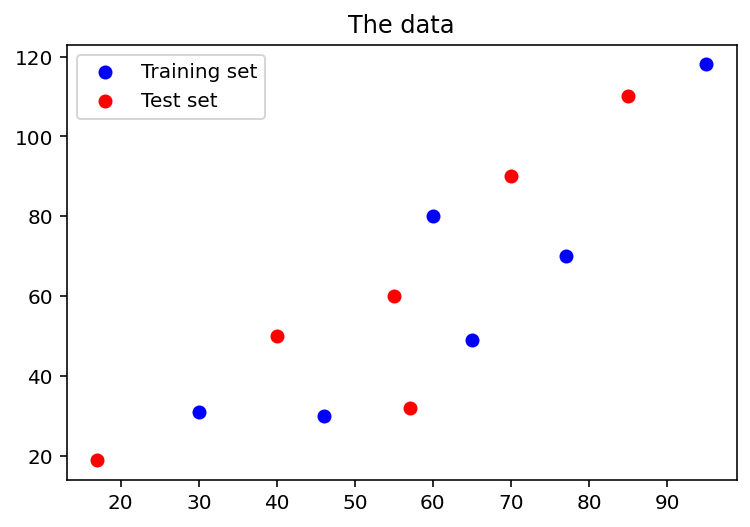

In [2]:
plt.figure(figsize=(6, 4))
plt.scatter(X_train, y_train, color='blue', label='Training set')
plt.scatter(X_test, y_test, color='red', label='Test set')
plt.title('The data')
plt.legend(loc='best')

## 2. Building Three Polynomial Models

### 2.1. First-degree polynomial

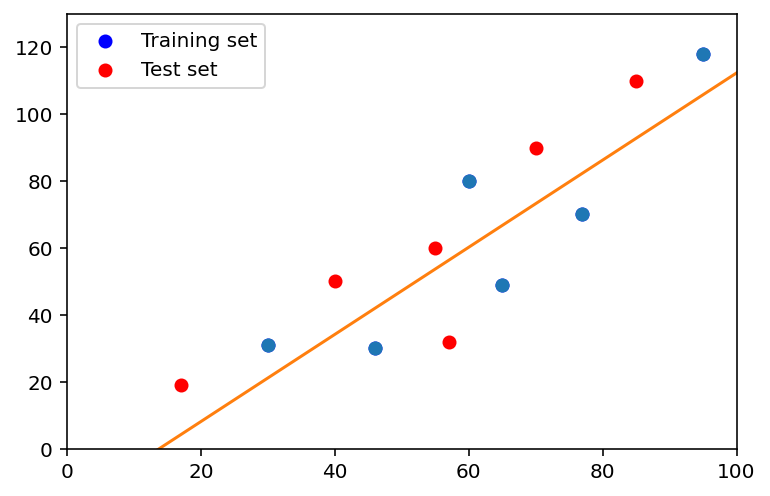

In [3]:
# build a model
degrees = 1
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 100, 100)

## visualization
#plot regression
plt.plot(X_train, y_train, 'o', t, p(t), '-')
#plot training dataset
plt.scatter(X_train, y_train, color='blue', label='Training set')
#plot test dataset
plt.scatter(X_test, y_test, color='red', label='Test set')

#plot configuration
plt.legend(loc='best')
plt.xlim((0,100))
plt.ylim((0,130))
plt.show()

### 2.2. Second-degree polynomial

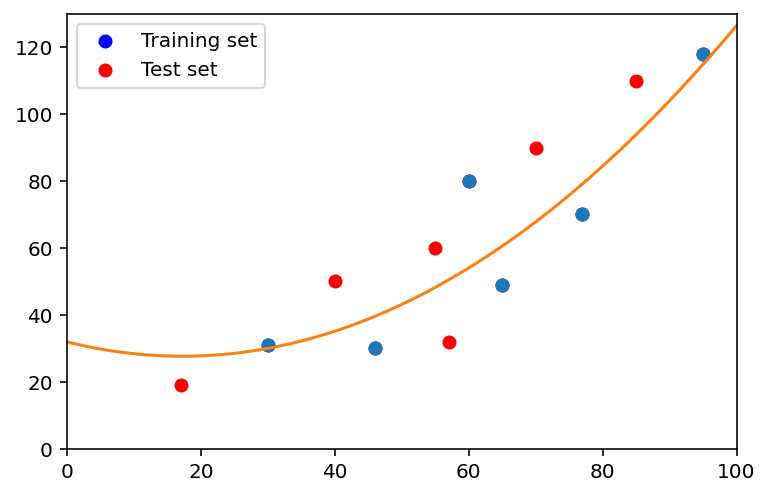

In [4]:
# build a model
degrees = 2
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 100, 100)

# visualize
plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.scatter(X_train, y_train, color='blue', label='Training set')
plt.scatter(X_test, y_test, color='red', label='Test set')
plt.legend(loc='best')
plt.xlim((0,100))
plt.ylim((0,130))
plt.show()

Let's see the estimated coefficients of the model

In [5]:
list(p.coef)

[0.014425999538340081, -0.4973416247674718, 31.898294657797386]

Let's see their absolute sum:

In [6]:
sum(abs(p.coef))



32.4100622821032

In [7]:
#or 
31.9 + 0.5 + 0.014

32.414

We can use the built model p(t) if we want to predict the price of any apartment, given its area. Let's predict the price of a 30-meter-squared apartment.

In [8]:
p(30) #in 10,000 -> 299,614

29.961445499279304

In [9]:
#alternatively:
def f(x):
    return np.array([(31.9 - 0.5 * i + 0.014 * i**2) for i in x])

#### 2.2.1 Calculate SSR_training and SSR_test

In [10]:
predict_train = p(X_train)
SSR_train = sum((predict_train-y_train)**2)

predict_test = p(X_test)
SSR_test = sum((predict_test-y_test)**2)

print('SSR_train = {} \n \n SSR_test = {}'.format(SSR_train, SSR_test))

SSR_train = 994.7785614408572 
 
 SSR_test = 1530.3762231241067


In [11]:
predict_train = f(X_train)
SSR_train = sum((predict_train-y_train)**2)

predict_test = f(X_test)
SSR_test = sum((predict_test-y_test)**2)

print('SSR_train = {} \n \n SSR_test = {}'.format(SSR_train, SSR_test))

SSR_train = 1027.0004120000003 
 
 SSR_test = 1757.0769119999998


### 2.3. Fourth-degree polynomial

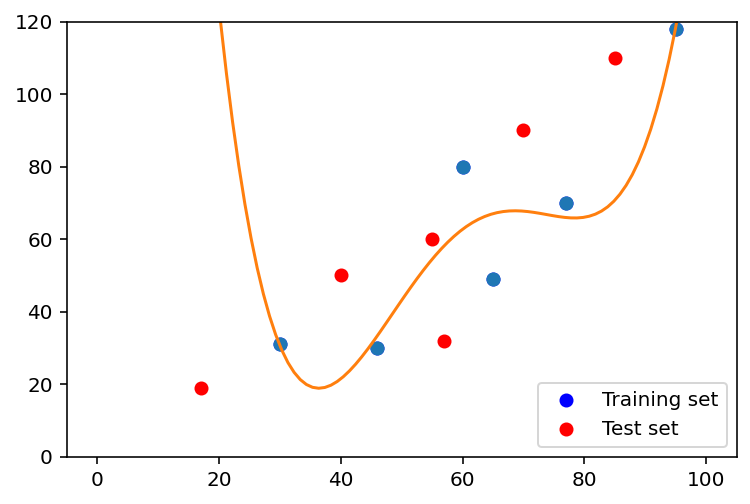

In [12]:
# build a model
degrees = 4
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 100, 100)

# visualize
plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.scatter(X_train, y_train, color='blue', label='Training set')
plt.scatter(X_test, y_test, color='red', label='Test set')
plt.legend(loc='best')
plt.ylim((0,120))
plt.show()

Let's see the estimated coefficients of the model

In [13]:
list(p.coef)

[8.489668977511541e-05,
 -0.020758975169594147,
 1.8214724130889242,
 -66.4626504642182,
 876.8597601245539]

Let's see their absolute sum:

In [14]:
sum(abs(p.coef))

945.1647268737204

In [15]:
#alternatively:
def f(x):
    return np.array([(876.9-66.46*i+1.821*i**2-0.02076*i**3+0.0000849*i**4) for i in x])

In [16]:
f([30])

array([30.249])

We can use the built model p(t) if we want to predict the price of any apartment, given its area. Let's predict the price of a 12-meter-squared apartment.

In [17]:
p(30)

30.579407116841026

Let's calculate SSR_training and SSR_test:

In [18]:
predict_train = p(X_train)
SSR_train = sum((predict_train-y_train)**2)

predict_test = p(X_test)
SSR_test = sum((predict_test-y_test)**2)

print('SSR_train = {} \n \n SSR_test = {}'.format(SSR_train, SSR_test))

SSR_train = 651.4179373305931 
 
 SSR_test = 29010.616059824526


In [19]:
predict_train

array([ 30.57940712,  33.33905077,  62.72388224,  67.03384222,
        65.96521691, 118.35860073])

In [20]:
f(X_train)

array([ 30.249    ,  32.4166544,  61.044    ,  65.0280625,  63.0571009,
       113.7780625])

In [21]:
predict_train = f(X_train)
SSR_train = sum((predict_train-y_train)**2)

predict_test = f(X_test)
SSR_test = sum((predict_test-y_test)**2)

print('SSR_train = {} \n \n SSR_test = {}'.format(SSR_train, SSR_test))

SSR_train = 688.6615471596378 
 
 SSR_test = 29379.046097639017


### 2.4. Fifth-degree polynomial

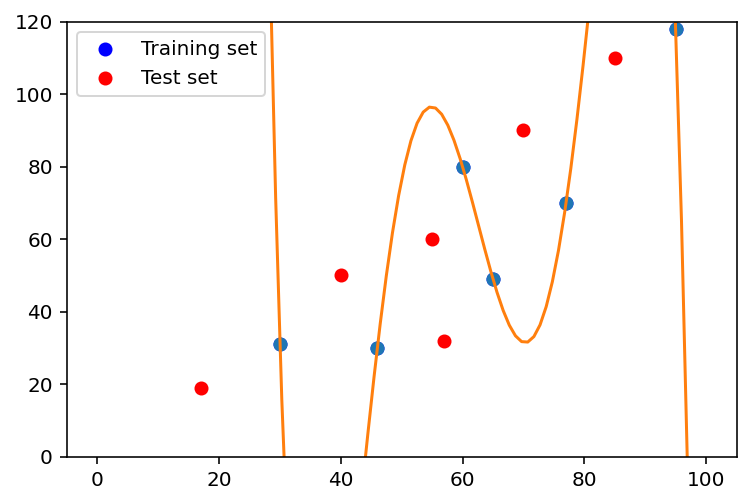

In [22]:
# build a model
degrees = 5
p = np.poly1d(np.polyfit(X_train, y_train, degrees))
t = np.linspace(0, 100, 100)

# visualize
plt.plot(X_train, y_train, 'o', t, p(t), '-')
plt.scatter(X_train, y_train, color='blue', label='Training set')
plt.scatter(X_test, y_test, color='red', label='Test set')
plt.legend(loc='best')
plt.ylim((0,120))
plt.show()

Let's see the estimated coefficients of the model

In [23]:
list(p.coef)

[-3.0177085755377384e-05,
 0.00944944287510749,
 -1.1443256656628589,
 66.75349695585578,
 -1866.2074401186833,
 19915.12337120615]

Let's see their absolute sum:

In [24]:
#alternatively:
def f(x):
    return np.array([(-3.017709e-05*i**5
                      +0.009449443*i**4
                      -1.144326*i**3
                      +66.7535*i**2
                      -1866.21*i
                      +19915.1) for i in x])

# #alternatively:
# def f(x):
#     return np.array([(876.9-66.46*i+1.821*i**2-0.02076*i**3+0.0000849*i**4) for i in x])

In [25]:
3.017709e-05+0.009449443+1.144326+66.7535+1866.21+19915.1
# + 4.430313e-05 + 0.001865759 + 0.24949 + 27.9861 + 996.46 + 12053.9

21849.217305620088

In [26]:
sum(abs(p.coef))

21849.238113566313

We can use the built model p(t) if we want to predict the price of any apartment, given its area. Let's predict the price of a 12-meter-squared apartment.

In [27]:
p(12)

5344.177524015313

In [28]:
f([12])

array([5344.12329639])

Let's calculate SSR_training and SSR_test:

In [29]:
predict_train = p(X_train)
SSR_train = sum((predict_train-y_train)**2)

predict_test = p(X_test)
SSR_test = sum((predict_test-y_test)**2)

print('SSR_train = {} \n \n SSR_test = {}'.format(SSR_train, SSR_test))

SSR_train = 3.163138662402778e-20 
 
 SSR_test = 6719065.318875373


In [30]:
predict_train = f(X_train)
SSR_train = sum((predict_train-y_train)**2)

predict_test = f(X_test)
SSR_test = sum((predict_test-y_test)**2)

print('SSR_train = {} \n \n SSR_test = {}'.format(SSR_train, SSR_test))

SSR_train = 0.6025432434314306 
 
 SSR_test = 6718669.713593046
